<a href="https://colab.research.google.com/github/Zoeyyy14/C119Titanic/blob/main/C119Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving Titanic.csv to Titanic.csv


In [3]:
import pandas as pd
col_names=["passengerID","pclass","sex","age","sibsp","parch","survived"]
df=pd.read_csv("Titanic.csv",names=col_names).iloc[1:]
print(df.head())

  passengerID pclass sex   age sibsp parch survived
1           1      3   1  34.5     1     0        0
2           2      1   0    47     1     0        1
3           3      3   0    62     0     0        1
4           4      1   0    27     1     0        1
5           5      3   1    22     0     0        0


In [4]:
features=["passengerID","pclass","sex","age","sibsp","parch"]
X=df[features]
Y=df.survived

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
clf=DecisionTreeClassifier(max_depth=3)
clf=clf.fit(X_train,Y_train)

Y_pred=clf.predict(X_test)
print("Accuracy",metrics.accuracy_score(Y_test,Y_pred))

Accuracy 0.746268656716418


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=features,class_names=["0","1"])
print(dot_data.getvalue())

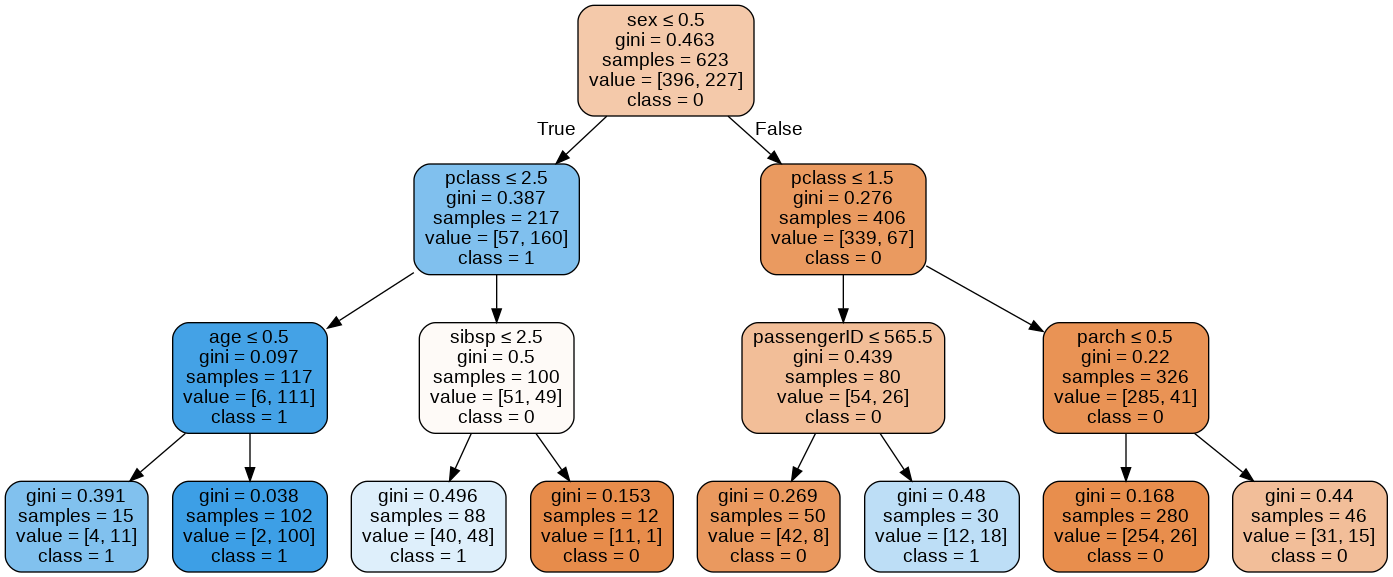

In [13]:
import pydotplus 
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Titanic.png")
Image(graph.create_png())